In [35]:
import pandas as pd

In [36]:
data = pd.read_csv(r"C:\Users\flyin\Downloads\Market-Basket-Analysis-in-Python-using-Apriori-Algorithm-main\Market-Basket-Analysis-in-Python-using-Apriori-Algorithm-main\Groceries_dataset[1].csv")

In [37]:
print(data.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [38]:
#Info check
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None


In [39]:
# Preprocessing: Convert 'Member_number' to string and 'Date' to datetime format
data['Member_number'] = data['Member_number'].astype(str)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

'''EDA

In [40]:
# Explore the shape and structure of the dataset
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:", data.columns)

Shape of the dataset: (38765, 3)

Columns in the dataset: Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [41]:
# Check data types and missing values
print("\nData types and missing values:")
print(data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB
None

Summary statistics of numerical columns:
                                Date
count                          38765
mean   2015-01-09 18:17:12.498387712
min              2014-01-01 00:00:00
25%              2014-07-12 00:00:00
50%              2015-01-21 00:00:00
75%              2015-07-10 00:00:00
max              2015-12-30 00:00:00

Missing values in the dataset:
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [42]:
# Visualizing the structure of the dataset using pairplot (if applicable)
import seaborn as sns

# Check if there are numerical variables to plot
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
    sns.pairplot(data[numeric_columns])
    plt.show()
else:
    print("No numerical variables found to plot.")

No numerical variables found to plot.


In [43]:
# Step 3: Market Basket Analysis

# Import necessary libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Preparation: Loading and preprocessing the dataset containing customer transactions
data['uniqueTransaction'] = data['Member_number'] + '_' + data['Date'].astype(str)
basket = pd.crosstab(data['uniqueTransaction'], data['itemDescription'])
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generating frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)

C:\Users\flyin\AppData\Local\Temp\ipykernel_20444\3313337199.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)
C:\Users\flyin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [44]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift")

# Sorting the rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Displaying the top association rules
print("Top 10 Association Rules:")
print(rules.head(10))

Top 10 Association Rules:
           antecedents         consequents  antecedent support  \
8        (frankfurter)  (other vegetables)            0.037760   
9   (other vegetables)       (frankfurter)            0.122101   
34            (yogurt)           (sausage)            0.085879   
35           (sausage)            (yogurt)            0.060349   
31           (sausage)              (soda)            0.060349   
30              (soda)           (sausage)            0.097106   
0       (bottled beer)        (whole milk)            0.045312   
1         (whole milk)      (bottled beer)            0.157923   
33           (sausage)        (whole milk)            0.060349   
32        (whole milk)           (sausage)            0.157923   

    consequent support   support  confidence      lift  representativity  \
8             0.122101  0.005146    0.136283  1.116150               1.0   
9             0.037760  0.005146    0.042146  1.116150               1.0   
34            0.060

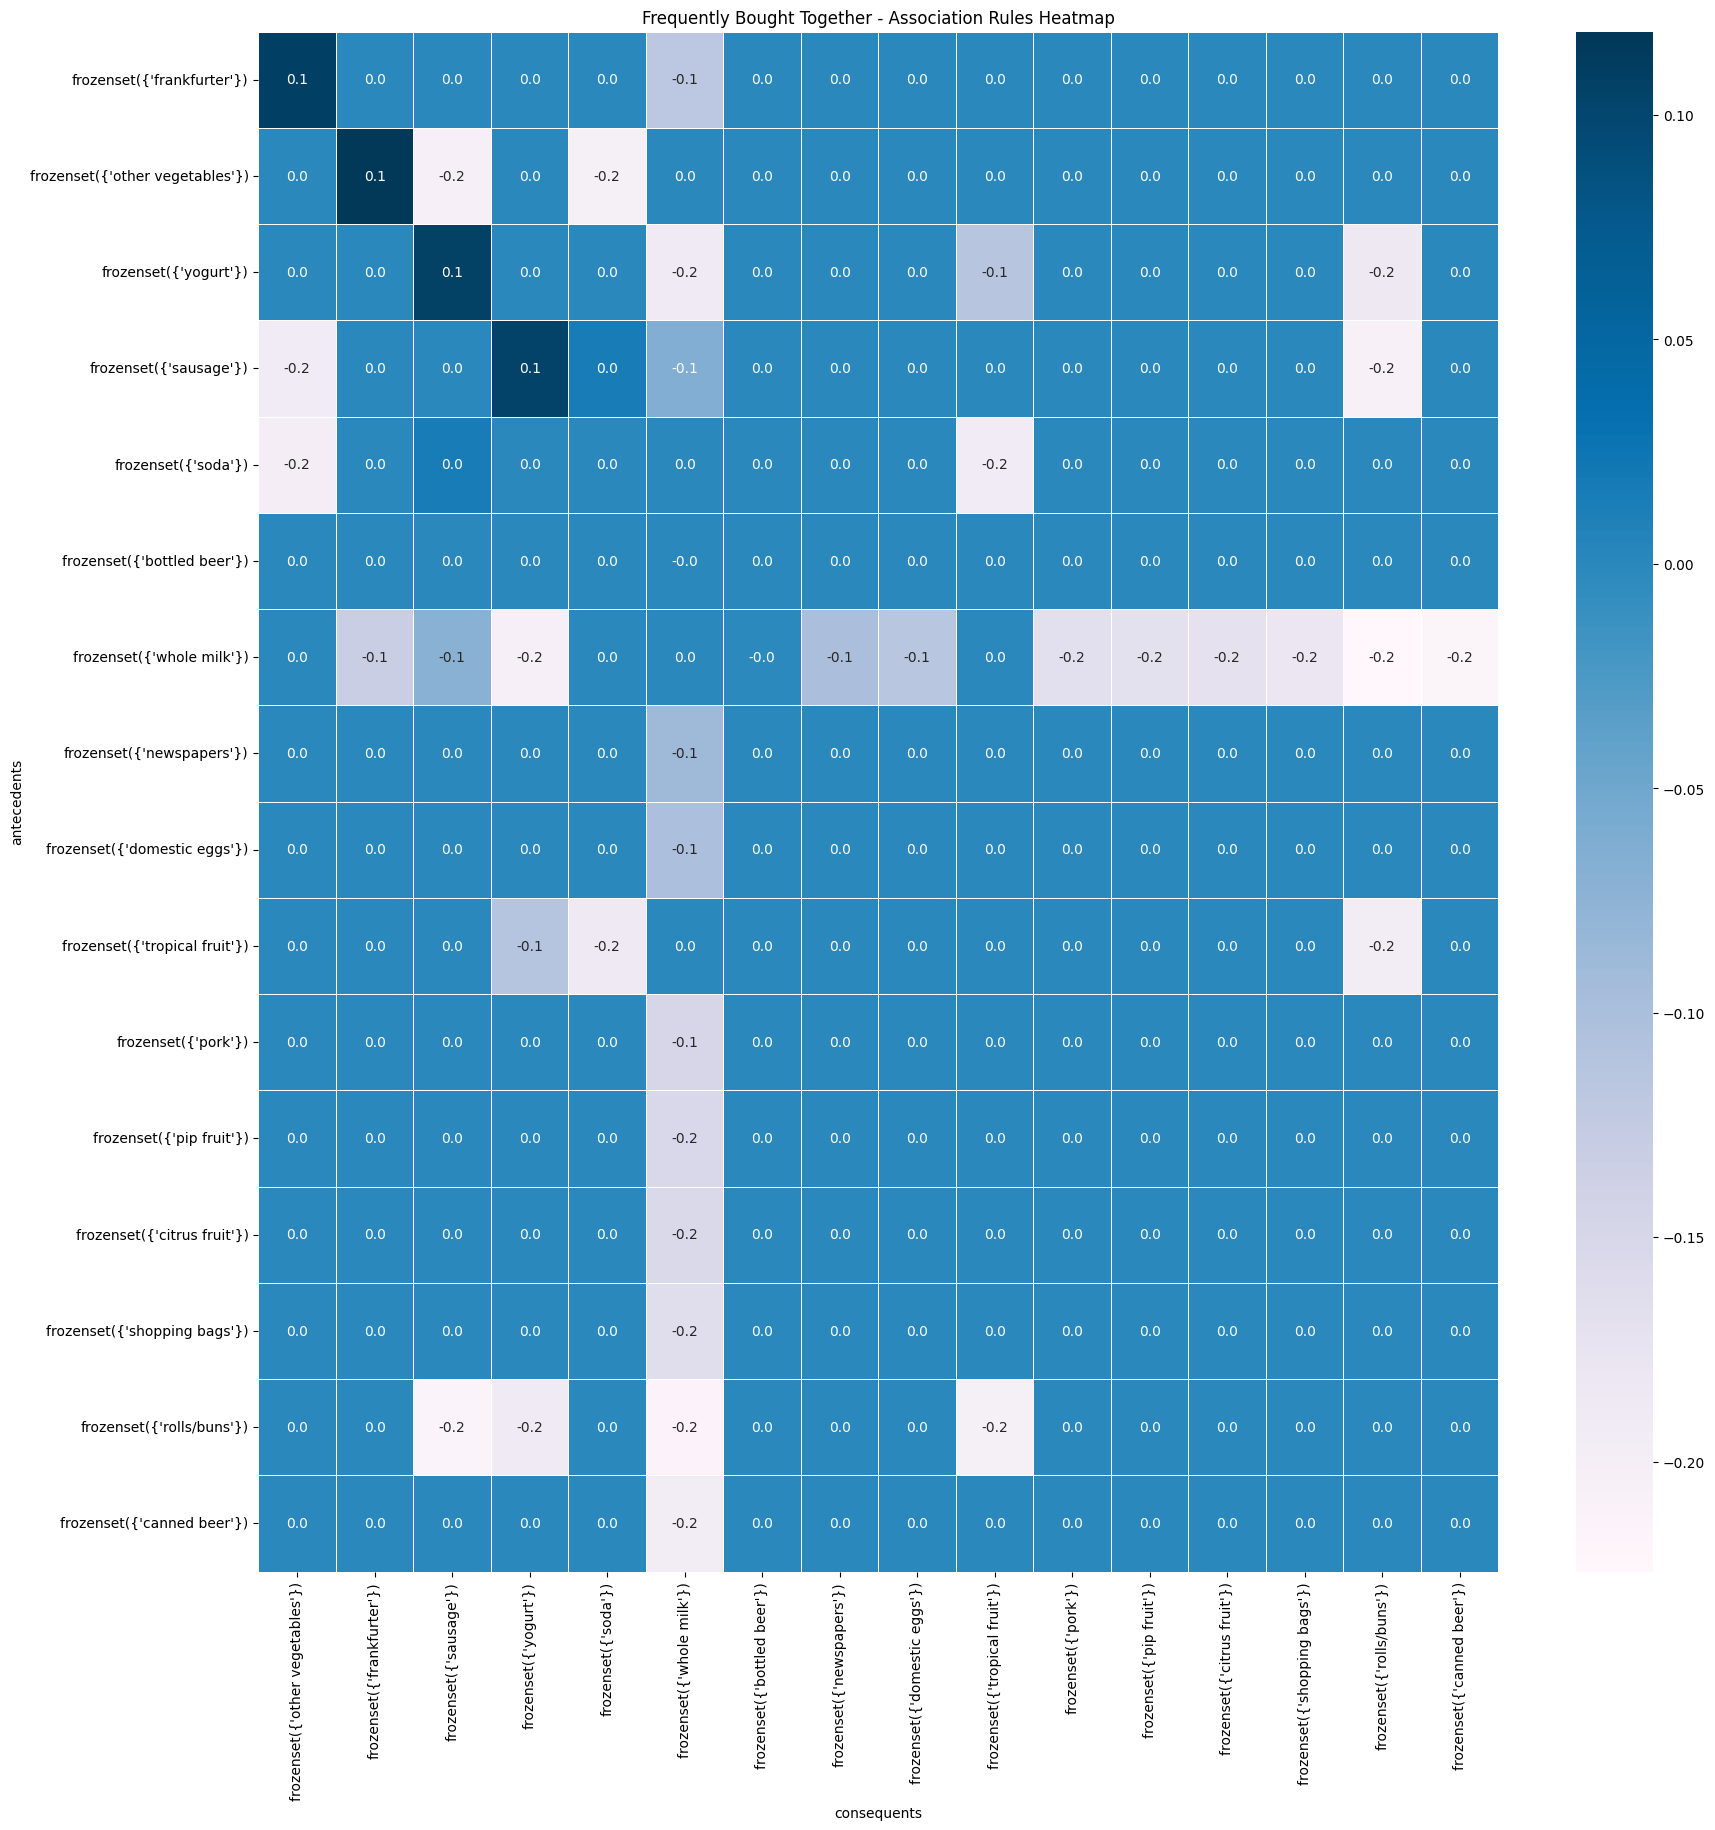

In [45]:
# Visualizing association rules heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

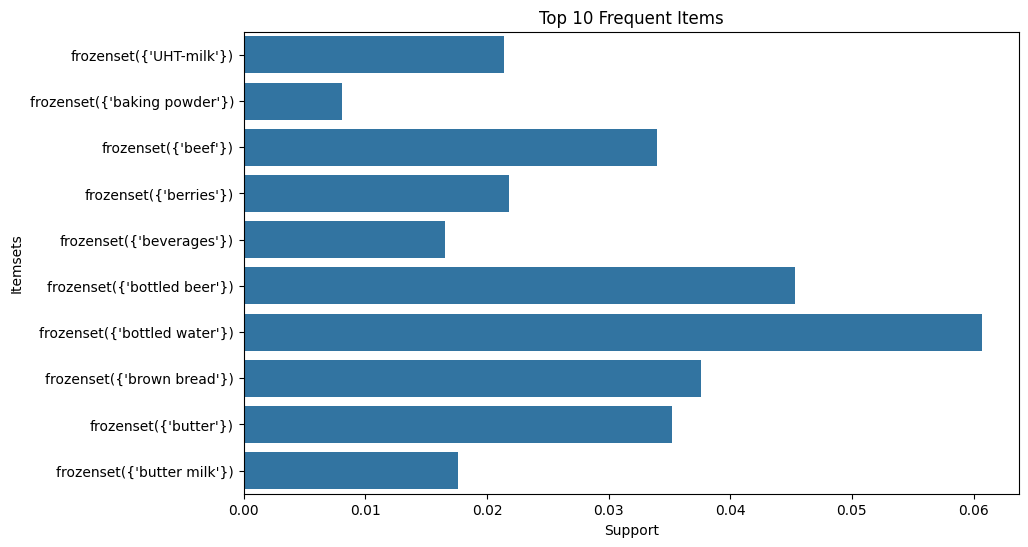

In [46]:
# Visualizing top 10 frequent itemsets
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting top 10 frequent items
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.head(10))
plt.title('Top 10 Frequent Items')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


In [47]:
#apriori takes list as an input, hence converting dtaset to a list
transactions = data.values.tolist()
transactions[:10]

[['1808',
  Timestamp('2015-07-21 00:00:00'),
  'tropical fruit',
  '1808_2015-07-21'],
 ['2552', Timestamp('2015-01-05 00:00:00'), 'whole milk', '2552_2015-01-05'],
 ['2300', Timestamp('2015-09-19 00:00:00'), 'pip fruit', '2300_2015-09-19'],
 ['1187',
  Timestamp('2015-12-12 00:00:00'),
  'other vegetables',
  '1187_2015-12-12'],
 ['3037', Timestamp('2015-02-01 00:00:00'), 'whole milk', '3037_2015-02-01'],
 ['4941', Timestamp('2015-02-14 00:00:00'), 'rolls/buns', '4941_2015-02-14'],
 ['4501',
  Timestamp('2015-05-08 00:00:00'),
  'other vegetables',
  '4501_2015-05-08'],
 ['3803', Timestamp('2015-12-23 00:00:00'), 'pot plants', '3803_2015-12-23'],
 ['2762', Timestamp('2015-03-20 00:00:00'), 'whole milk', '2762_2015-03-20'],
 ['4119',
  Timestamp('2015-02-12 00:00:00'),
  'tropical fruit',
  '4119_2015-02-12']]

In [48]:
transactions = [
    [str(item) if isinstance(item, pd.Timestamp) else item for item in transaction]
    for transaction in transactions
]


In [49]:
import pandas as pd

# Loại bỏ Timestamp khỏi các giao dịch
cleaned_transactions = [
    [item for item in transaction if not isinstance(item, pd.Timestamp)]
    for transaction in transactions
]
